# Market Basket Analysis

Very insightful activity, from the historical data it is possible to find top products to recommend.

Optimization criteria can be modified according to strategy or business needs.

Therefore, this can be considered as a very nice starting point to dive deeper in creative ideas for sales and marketing.

Example of insights: 

- Relevant for placing products inside stores or to define promotions
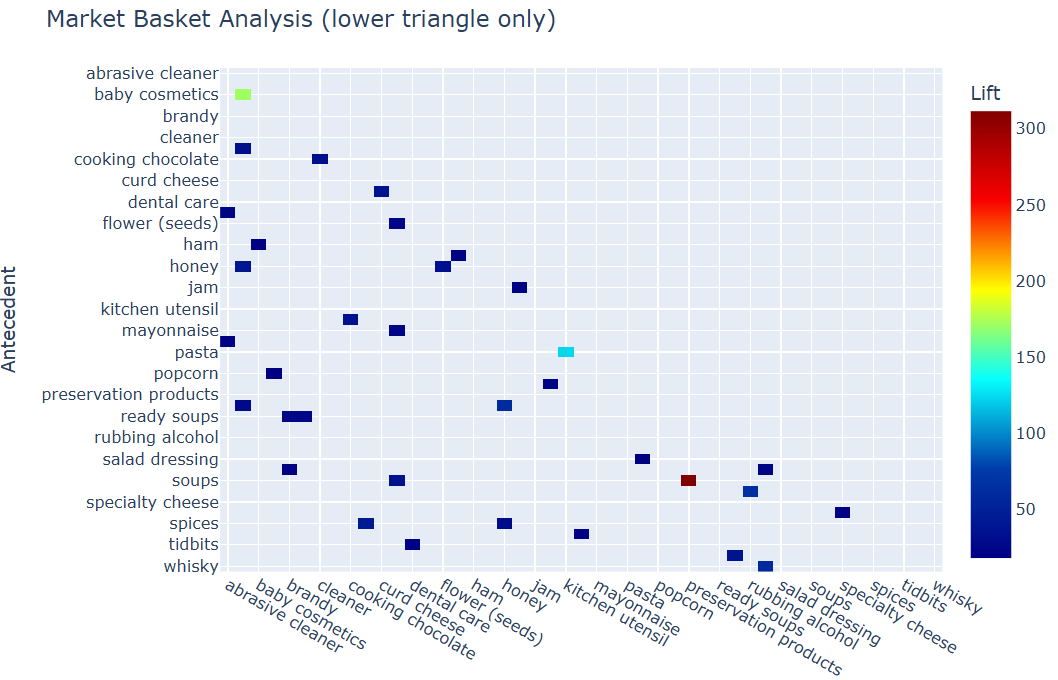
- 
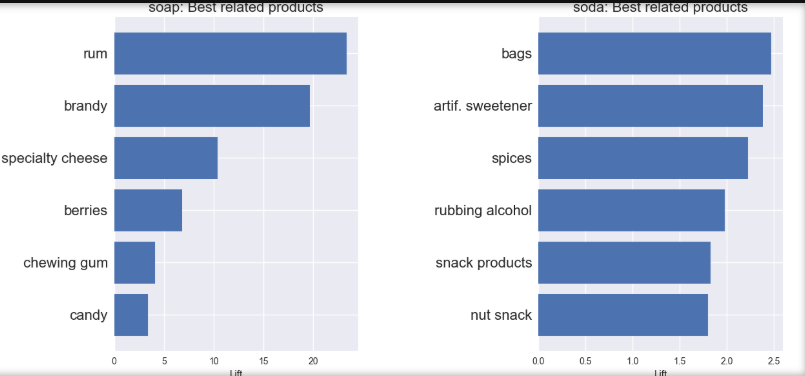

- Relevant for customized suggestions for specific customers:
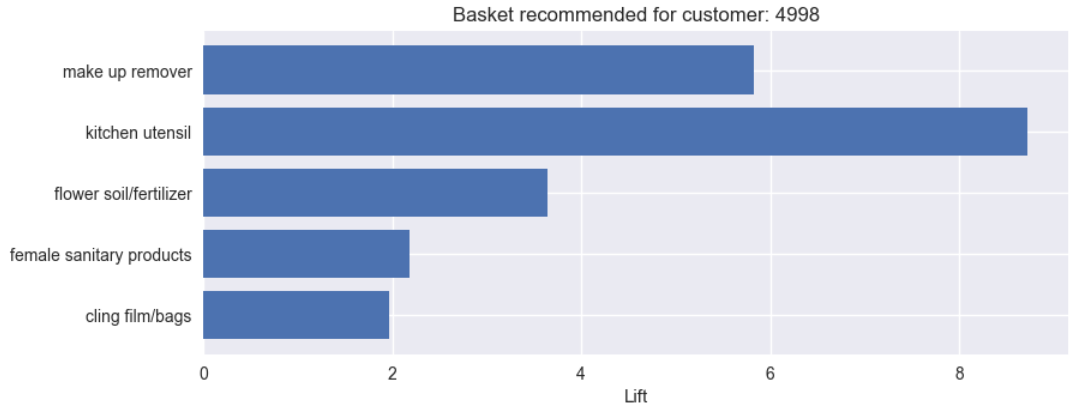

# Libraries

In [578]:
import numpy as np
import pandas as pd
from itertools import chain

import matplotlib.pyplot as plt  # Graphics (normal)
plt.style.use('seaborn-v0_8') # Style for matplotlib charts (optional, but makes easier to read charts)
plt.rcParams['figure.figsize'] = [9.3, 3.5] # Size for matplotlib charts (optional, but useful) 

import plotly.express as px  # Graphics (more options and interactivity)
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Data import

In [579]:
market_basket_df = pd.read_csv(r'C:\Arquivos\Fermin\2023-12_Aprender\Machine Learning\Proyecto - Market Basket Analysis\Groceries data.csv')

In [580]:
market_basket_df.head()

Member_number        Date   itemDescription  year  month  day  day_of_week
0           1808  2015-07-21    tropical fruit  2015      7   21            1
1           2552  2015-05-01        whole milk  2015      5    1            4
2           2300  2015-09-19         pip fruit  2015      9   19            5
3           1187  2015-12-12  other vegetables  2015     12   12            5
4           3037  2015-01-02        whole milk  2015      1    2            4

In [581]:
market_basket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [582]:
market_basket_df.nunique()

Member_number      3898
Date                728
itemDescription     167
year                  2
month                12
day                  31
day_of_week           7
dtype: int64

# Data transformation

- Drop columns of year, month, day, day_of_week (not relevant at this moment)
- Rename columns to customer, date, item
- Convert date column to datetime format

In [583]:
df = market_basket_df.iloc[:,0:3].copy()  # inside iloc, second filter number is not included [)

In [584]:
df.columns = ['customer', 'date', 'item' ]

In [585]:
df['date'] = pd.to_datetime(df.date)

In [586]:
df.head()

customer       date              item
0      1808 2015-07-21    tropical fruit
1      2552 2015-05-01        whole milk
2      2300 2015-09-19         pip fruit
3      1187 2015-12-12  other vegetables
4      3037 2015-01-02        whole milk

In [587]:
sorted(df.item.unique())

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

For convenience, I will rename items: 

- From: 'Instant food products', 'UHT-milk'
- To 'instant food products', 'uht milk'

In [588]:
rename_products = {
                    'Instant food products': 'instant food products',
                    'UHT-milk': 'uht milk'
                    }

df['item'] = df.item.replace(rename_products)

In [589]:
sorted(df.item.unique())

['abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'frozen potato products',
 'frozen vegetables

Grouping data to date and customer

In [590]:
basket_df = df.groupby(['date', 'customer']).item.apply(list).reset_index()

In [591]:
basket_df.columns = ['date', 'customer', 'item']

Checking that everything is fine

In [592]:
basket_df.head(5)

date  customer                                      item
0 2014-01-01      1249                    [citrus fruit, coffee]
1 2014-01-01      1381                              [curd, soda]
2 2014-01-01      1440                [other vegetables, yogurt]
3 2014-01-01      1659  [specialty chocolate, frozen vegetables]
4 2014-01-01      1789                 [hamburger meat, candles]

It is more convenient to list item list in alphabetical order

In [593]:
basket_df['item'] = basket_df.item.apply(sorted)

In [594]:
basket_df.head(5)

date  customer                                      item
0 2014-01-01      1249                    [citrus fruit, coffee]
1 2014-01-01      1381                              [curd, soda]
2 2014-01-01      1440                [other vegetables, yogurt]
3 2014-01-01      1659  [frozen vegetables, specialty chocolate]
4 2014-01-01      1789                 [candles, hamburger meat]

# Understanding data

New column to understand the size of the basket.

This basket size will be visualized afterwards.

In [595]:
basket_df['basket_size'] = basket_df.item.apply(len)

Visualizing overall basket size

Distribution using histogram

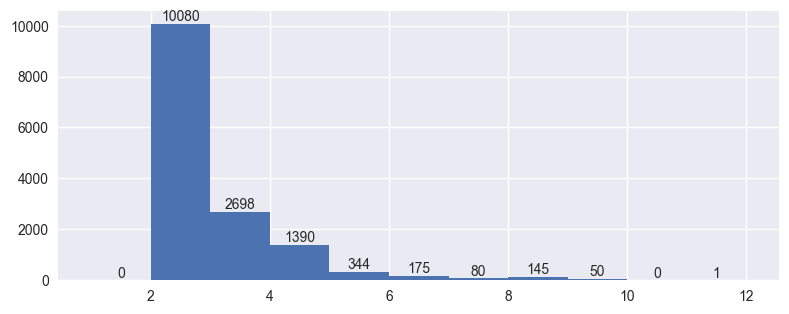

In [596]:
bins_number_to_play_with = 13 # Modify this number to adjust histogram

bins = np.arange(1, bins_number_to_play_with)

counts, bin_edges, _ = plt.hist(basket_df.basket_size, bins=bins)

for count, edge in zip(counts, bin_edges[:-1]):
    plt.text(edge + 0.5, count, str(int(count)), ha='center', va='bottom')

Visualizing basket size by customer

Distribution using boxplot (data can be zoomed, percentiles are visible by pointing with the mouse)

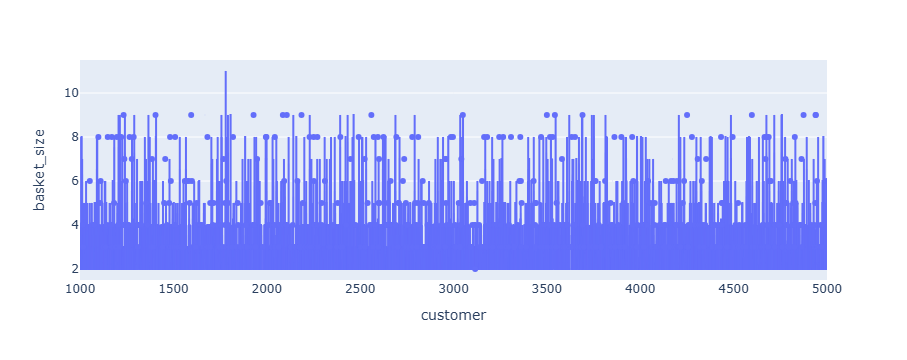


Basket size median: 2.0
Basket size mean: 2.591
Basket size percentile 90: 4.0


In [597]:
figplotly = px.box(basket_df, x='customer', y='basket_size')
figplotly.show()

print()
print(f'Basket size median: {basket_df.basket_size.median()}')
print(f'Basket size mean: {round(basket_df.basket_size.mean(), 3)}')
print(f'Basket size percentile 90: {basket_df.basket_size.quantile(.9)}')

These charts above show different ways of perceiving that: 

- Most purchases are a 2-item-basket... 4 items at the most in 90% of the cases.
- Nobody buys only 1 item

# Assessing correlated items in a basket

Considering all the purchasers as population

In [598]:
unique_items = sorted(df.item.unique())

# Create all (antecedent, consequent) pairs where they are not equal
pair_of_items = [
    {'antecedent': antecedent, 'consequent': consequent}
    for antecedent in unique_items
    for consequent in unique_items
    if antecedent != consequent
]

stats_df = pd.DataFrame(pair_of_items)

## Definition of support values

support(product_A) = amount of transactions with product_A / amount of transactions

support(product_A) is similar to probability(product_A)

Support values for antecedent items as well as for consequent items, both individually

In [599]:
item_support_series = basket_df.item.explode().value_counts() / len(basket_df)

stats_df['support_antecedent'] = stats_df.antecedent.map(item_support_series)
stats_df['support_consequent'] = stats_df.consequent.map(item_support_series)

Support values for both antecedent and consequent items together.

Value similar to probability(product_antecedent AND product_consequent)

### Version: slow calculation

Working with lists is nice, but list searches are slow.

It is here as code storage, but is not meant to be run

In [600]:
"""
stats_df['support_both'] = [
    sum(a in items and b in items for items in basket_df['item']) / len(basket_df)
    for a, b in zip(stats_df.antecedent, stats_df.consequent)
]
"""

"\nstats_df['support_both'] = [\n    sum(a in items and b in items for items in basket_df['item']) / len(basket_df)\n    for a, b in zip(stats_df.antecedent, stats_df.consequent)\n]\n"

### Version: faster calculation

Python lookups are faster with sets than with lists

In any case, this is the most time-consuming calculation

In [601]:
basket_sets = [set(items) for items in basket_df['item']]

stats_df['support_both'] = [
    sum(a in items and b in items for items in basket_sets) / len(basket_df)
    for a, b in zip(stats_df.antecedent, stats_df.consequent)
]


In [602]:
stats_df.loc[stats_df.support_both >= 0.011]

antecedent        consequent  support_antecedent  \
16929  other vegetables        whole milk            0.126846   
20249        rolls/buns        whole milk            0.114683   
22905              soda        whole milk            0.101183   
27325        whole milk  other vegetables            0.167212   
27345        whole milk        rolls/buns            0.167212   
27361        whole milk              soda            0.167212   
27388        whole milk            yogurt            0.167212   
27554            yogurt        whole milk            0.089153   

       support_consequent  support_both  
16929            0.167212      0.014837  
20249            0.167212      0.013968  
22905            0.167212      0.011629  
27325            0.126846      0.014837  
27345            0.114683      0.013968  
27361            0.101183      0.011629  
27388            0.089153      0.011161  
27554            0.167212      0.011161

## Definition of confidence and lift

- Confidence: support of both / support of antecedent
- Lift: support of both / ( (support of antecedent) · (support of consequent) )

- Confident is probability(consequent | antecedent)
- Lift is probablility(consequent | antecedent) / probability (consequent)

- Lift > 1 sales antecedent generates more sales of consequent, which is a change to increase revenue by promoting these consequent products
- Lift = 0 antecedent and consequent are in theory mutually exclusive (not quite realistic for market basket, unless the number of purchases is very large, which is not the case for this dataset)

In [603]:
stats_df['confidence'] = stats_df.support_both / stats_df.support_antecedent

# To facilitate analysis, lift column should be very close to antecedent and consequent columns.
# This is the reason why this code looks different to the one to calculate confidence

stats_df.insert(
    loc=2,
    column='lift',
    value= stats_df.support_both / (stats_df.support_antecedent * stats_df.support_consequent)
)

In [604]:
stats_df.sort_values(by='lift', ascending=False).head(30)

antecedent             consequent        lift  \
23353                  soups  preservation products  311.729167   
18897  preservation products                  soups  311.729167   
333           baby cosmetics       artif. sweetener  171.988506   
167         artif. sweetener         baby cosmetics  171.988506   
17176                  pasta        kitchen utensil  123.661157   
13050        kitchen utensil                  pasta  123.661157   
23529         sparkling wine        rubbing alcohol   65.056522   
20558        rubbing alcohol         sparkling wine   65.056522   
19159               prosecco                  honey   60.578947   
11568                  honey               prosecco   60.578947   
26850                 whisky                    rum   58.449219   
20744                    rum                 whisky   58.449219   
5956                cookware                 spices   44.008824   
24437                 spices               cookware   44.008824   
11455                  honey       artif. sweetener   39.689655   
234         artif. sweetener                  honey   39.689655   
25684         toilet cleaner         roll products    36.495122   
20073         roll products          toilet cleaner   36.495122   
6513             curd cheese            decalcifier   36.142512   
6679             decalcifier            curd cheese   36.142512   
6779             decalcifier                  soups   34.636574   
23280                  soups            decalcifier   34.636574   
5722       cooking chocolate            light bulbs   34.397701   
13148            light bulbs      cooking chocolate   34.397701   
11506                  honey         flower (seeds)   32.885714   
8700          flower (seeds)                  honey   32.885714   
196         artif. sweetener           cocoa drinks   32.247845   
5147            cocoa drinks       artif. sweetener   32.247845   
5673       cooking chocolate                cleaner   32.178495   
4847                 cleaner      cooking chocolate   32.178495   

       support_antecedent  support_consequent  support_both  confidence  
23353            0.003208            0.000067      0.000067    0.020833  
18897            0.000067            0.003208      0.000067    1.000000  
333              0.000200            0.001938      0.000067    0.333333  
167              0.001938            0.000200      0.000067    0.034483  
17176            0.008087            0.000067      0.000067    0.008264  
13050            0.000067            0.008087      0.000067    1.000000  
23529            0.003074            0.000334      0.000067    0.021739  
20558            0.000334            0.003074      0.000067    0.200000  
19159            0.001270            0.000869      0.000067    0.052632  
11568            0.000869            0.001270      0.000067    0.076923  
26850            0.000535            0.002139      0.000067    0.125000  
20744            0.002139            0.000535      0.000067    0.031250  
5956             0.001136            0.002673      0.000134    0.117647  
24437            0.002673            0.001136      0.000134    0.050000  
11455            0.000869            0.001938      0.000067    0.076923  
234              0.001938            0.000869      0.000067    0.034483  
25684            0.000334            0.005480      0.000067    0.200000  
20073            0.005480            0.000334      0.000067    0.012195  
6513             0.003074            0.000601      0.000067    0.021739  
6679             0.000601            0.003074      0.000067    0.111111  
6779             0.000601            0.003208      0.000067    0.111111  
23280            0.003208            0.000601      0.000067    0.020833  
5722             0.001002            0.001938      0.000067    0.066667  
13148            0.001938            0.001002      0.000067    0.034483  
11506            0.000869            0.004678      0.000134    0.153846  
8700            

In [605]:
stats_df.lift.describe()

count    27722.000000
mean         0.791195
std          3.811822
min          0.000000
25%          0.000000
50%          0.000000
75%          0.878110
max        311.729167
Name: lift, dtype: float64

All very interesting.

## Visualization of correlated items in a basket

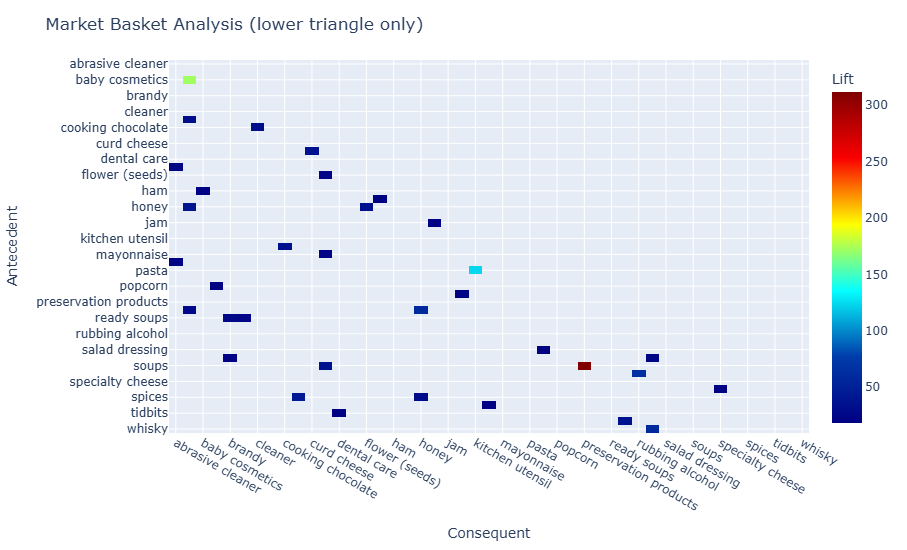

In [606]:
#=================================
# Chart configuration area
#=================================

# Filter minimum value of lift

lift_min = 18   # It is interesting to be >= 1
lift_max = 55555 # No problem if it is above the maximum value, it will be fixed automatically

# Chart height and width

chart_height = 550
chart_width = 800

#=================================
# End of Chart configuration area
#=================================

lift_upper = min(lift_max, stats_df.lift.max() )
lift_filter = ( (stats_df.lift >= lift_min) & (stats_df.lift <= lift_upper) )

chart_df = stats_df.loc[lift_filter]

# Step 1: Create the lift matrix
lift_matrix = chart_df.pivot(index='antecedent', columns='consequent', values='lift')
#lift_matrix = chart_df.pivot(index='antecedent', columns='consequent', values='lift').dropna(axis=1, how='all')

# Step 2: Mask the upper triangle (keep only lower triangle)
mask = pd.DataFrame(True, index=lift_matrix.index, columns=lift_matrix.columns)
for i, row_label in enumerate(lift_matrix.index):
    for j, col_label in enumerate(lift_matrix.columns):
        if i > j:
            mask.loc[row_label, col_label] = False

# Apply the mask: set upper triangle values to NaN
masked_lift = lift_matrix.mask(mask)

# Step 3: Plot the heatmap
figplotly = px.imshow(
    masked_lift,
    width= chart_width,
    height=chart_height,
    labels=dict(x="Consequent", y="Antecedent", color="Lift"),
    x=masked_lift.columns,
    y=masked_lift.index,
    color_continuous_scale='Jet',
    aspect='auto'
)

figplotly.update_layout(
    title=f'Market Basket Analysis (lower triangle only)',
    xaxis_title="Consequent",
    yaxis_title="Antecedent",
    xaxis=dict(
        tickangle=30  # Rotates X-axis labels by 30 degrees
    )

)

figplotly.show()

# Best products to promote together

In [607]:
#=================================
# Chart configuration area
#=================================

max_items = 6    # Top items amount with the highest lift
chart_columns = 3
row_height = 6
title_font_size = 16
label_font_size = 16

#=================================
# End of Chart configuration area
#=================================


unique_items = sorted(df.item.unique())
num_items = len(unique_items)
cols = chart_columns
rows = (num_items + cols - 1) // cols  # Ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(20, row_height * rows))
axes = axes.flatten()

for i, item in enumerate(unique_items):
    ax = axes[i]
    
    # Filter and sort data
    chart_df = stats_df.loc[stats_df.antecedent == item].sort_values(
        by='lift', ascending=False
    ).head(max_items)
    
    chart_df = chart_df.sort_values(by='lift', ascending=True)  # Bigger bars on top
    
    # Plot horizontal bar chart
    ax.barh(y=chart_df.consequent, width=chart_df.lift)#, color='skyblue')
    ax.set_title(f'{item}: Best related products', fontsize=title_font_size)
    ax.set_xlabel('Lift')
    ax.tick_params(axis='y', labelsize=label_font_size)

    #ax.set_ylabel('Consequent')

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Best products to promote for a specific customer, based on their historical data

After having done the purchase, the calculation would be different, ideally based on actual purchased items.

(array([349., 689., 811., 767., 552., 381., 208.,  67.,  48.,  21.,   5.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <BarContainer object of 11 artists>)

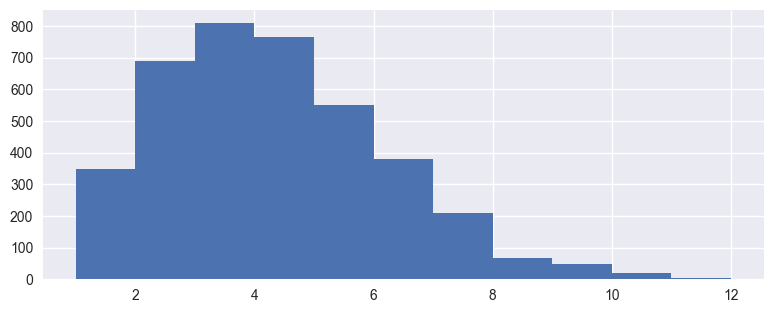

In [608]:
bins_number_to_play_with = 13 # Modify this number to adjust histogram

bins = np.arange(1, bins_number_to_play_with)
plt.hist(basket_df.groupby('customer').date.count(), bins=bins)

In [609]:
basket_df.date.max() - basket_df.date.min()

Timedelta('728 days 00:00:00')

The frequency of purchases is also a serious issue for this particular business.

But this is a different problem.

In [610]:
customer_basket_analysis = basket_df.groupby('customer').item.apply(lambda x: sorted(set(chain.from_iterable(x)))).reset_index()


In [611]:
customer_basket_analysis.columns =['customer','historical_basket']

In [612]:
customer_basket_analysis['historical_basket_count'] = customer_basket_analysis.historical_basket.apply(len)


Numer of unique items sold: 167
Mean number of unique items purchased: 9



(array([  6., 248.,  87., 331., 261., 381., 303., 332., 340., 296., 276.,
        238., 181., 179., 123.,  97.,  66.,  46.,  39.,  28.,  15.,  13.,
          3.,   5.,   2.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27.]),
 <BarContainer object of 26 artists>)

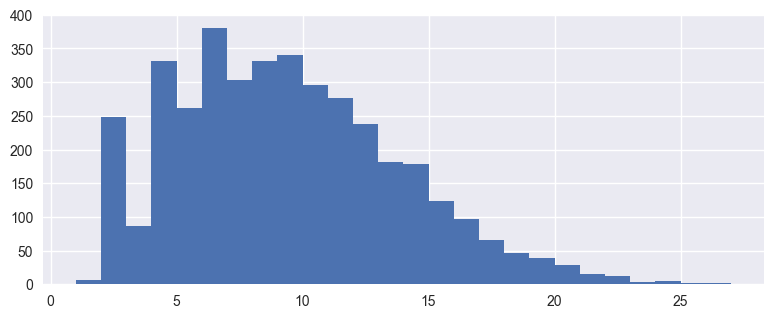

In [613]:
bins_number_to_play_with = 28 # Modify this number to adjust histogram

print()
print(f'Numer of unique items sold: {df.item.nunique()}')
print(f'Mean number of unique items purchased: {round(customer_basket_analysis.historical_basket_count.mean())}')
print()

bins = np.arange(1, bins_number_to_play_with)
plt.hist(customer_basket_analysis.historical_basket_count, bins=bins)

Customers:

- Do not visit store frequently
- Purchase very few unique items

Data science is here to help

Preparing dataframe with the recommended basket

In [614]:
customer_basket_analysis['recommended_basket'] = ''
customer_basket_analysis['lift_recommended_basket'] = ''

In [615]:
customer_basket_analysis

customer                                  historical_basket  \
0         1000  [canned beer, hygiene articles, misc. beverage...   
1         1001  [beef, curd, frankfurter, rolls/buns, sausage,...   
2         1002  [butter, butter milk, frozen vegetables, other...   
3         1003  [dental care, detergent, frozen meals, rolls/b...   
4         1004  [canned beer, chocolate, cling film/bags, dish...   
...        ...                                                ...   
3893      4996  [bottled beer, bottled water, decalcifier, des...   
3894      4997  [canned beer, curd, grapes, tropical fruit, wh...   
3895      4998                                 [curd, rolls/buns]   
3896      4999  [berries, bottled water, butter milk, detergen...   
3897      5000  [bottled beer, fruit/vegetable juice, onions, ...   

      historical_basket_count recommended_basket lift_recommended_basket  
0                          11                                             
1                           9                                             
2                           8                                             
3                           6                                             
4                          16                                             
...                       ...                ...                     ...  
3893                       10                                             
3894                        6                                             
3895                        2                                             
3896                       14                                             
3897                        7                                             

[3898 rows x 5 columns]

In [616]:
#=================================
# Configuration area
#=================================

max_items = 5    # Top items to recommend (balance between lift and lift and repeated counts)

#=================================
# End of Chart configuration area
#=================================

for filtered_customer in customer_basket_analysis.customer.unique():

    # Historical market basket for a given customer
    basket_filter = customer_basket_analysis.loc[
        customer_basket_analysis.customer == filtered_customer, 'historical_basket'
        ].tolist()[0]  # To guarantee it is a list

    # Filter statistical analysis for items already purchased by customer
    stats_filter = stats_df.loc[stats_df.antecedent.isin(basket_filter)].sort_values(by='lift', ascending=False)

    # Filter for items with lift > 1
    stats_filter = stats_filter.loc[stats_filter.lift >1]

    # Give priority for items with lift > 1 for several historically purchased items
    ## Count in how many products 
    stats_filter['consequent_count'] = stats_filter.consequent.map(stats_filter.consequent.value_counts())

    ## Give a priority criteria to choose products to recommend
    ## This priority criteria can be defined otherwise, depending on objectives of the study
    stats_filter['lift_and_count'] = stats_filter.lift * stats_filter.consequent_count

    ## Clean duplicated items (simply choose the max values of lift and lift_and_count)
    ## Items already listed in top-down

    stats_filter = stats_filter.groupby('consequent')[
            ['lift', 'lift_and_count']
            ].max().reset_index().sort_values(
                by='lift_and_count', ascending=False
                )
    items_to_actually_recommend = min(len(stats_filter), max_items)
    stats_filter = stats_filter.head(items_to_actually_recommend)

    basket_recommended = stats_filter.consequent.tolist()
    basket_recommended_lift = stats_filter.lift.tolist()

    # Assign to the correct row using .at[]
    customer_index = customer_basket_analysis.index[
        customer_basket_analysis.customer == filtered_customer
    ][0]

    customer_basket_analysis.at[customer_index, 'recommended_basket'] = basket_recommended
    customer_basket_analysis.at[customer_index, 'lift_recommended_basket'] = basket_recommended_lift

In [617]:
customer_basket_analysis

customer                                  historical_basket  \
0         1000  [canned beer, hygiene articles, misc. beverage...   
1         1001  [beef, curd, frankfurter, rolls/buns, sausage,...   
2         1002  [butter, butter milk, frozen vegetables, other...   
3         1003  [dental care, detergent, frozen meals, rolls/b...   
4         1004  [canned beer, chocolate, cling film/bags, dish...   
...        ...                                                ...   
3893      4996  [bottled beer, bottled water, decalcifier, des...   
3894      4997  [canned beer, curd, grapes, tropical fruit, wh...   
3895      4998                                 [curd, rolls/buns]   
3896      4999  [berries, bottled water, butter milk, detergen...   
3897      5000  [bottled beer, fruit/vegetable juice, onions, ...   

      historical_basket_count  \
0                          11   
1                           9   
2                           8   
3                           6   
4                          16   
...                       ...   
3893                       10   
3894                        6   
3895                        2   
3896                       14   
3897                        7   

                                     recommended_basket  \
0     [decalcifier, liqueur, salad dressing, softene...   
1     [rubbing alcohol, baby cosmetics, ready soups,...   
2     [rubbing alcohol, make up remover, salad dress...   
3     [whisky, tidbits, popcorn, rice, house keeping...   
4     [ready soups, bathroom cleaner, rubbing alcoho...   
...                                                 ...   
3893  [curd cheese, soups, mayonnaise, decalcifier, ...   
3894  [nuts/prunes, frozen chicken, honey, artif. sw...   
3895  [make up remover, kitchen utensil, flower soil...   
3896  [whisky, frozen chicken, zwieback, salad dress...   
3897  [decalcifier, canned fruit, rubbing alcohol, s...   

                                lift_recommended_basket  
0     [11.708137715179967, 6.985527544351074, 18.610...  
1     [10.319310344827587, 9.666020671834627, 5.5112...  
2     [11.378707224334603, 12.469166666666668, 10.39...  
3     [14.387499999999998, 20.610192837465565, 9.446...  
4     [9.779738562091504, 12.057211925866238, 8.1876...  
...                                                 ...  
3893  [36.14251207729469, 34.63657407407408, 22.1674...  
3894  [7.728822314049586, 17.00340909090909, 5.23181...  
3895  [5.822178988326848, 8.719696969696969, 3.63886...  
3896  [14.387499999999998, 18.821383647798744, 8.312...  
3897  [11.708137715179967, 7.008430913348946, 5.7772...  

[3898 rows x 5 columns]

## Comments:

- Recommended basket is already in order of more to less relevance to promote, based on the idea of maximizing lift x occurrence
- The number of recommended basket size is customizable
- There is flexibility for other criteria to pick the most suitable products to suggest

## Visually

Example of only one customer (this can obviously be modified, but there are 3898 customers listed)

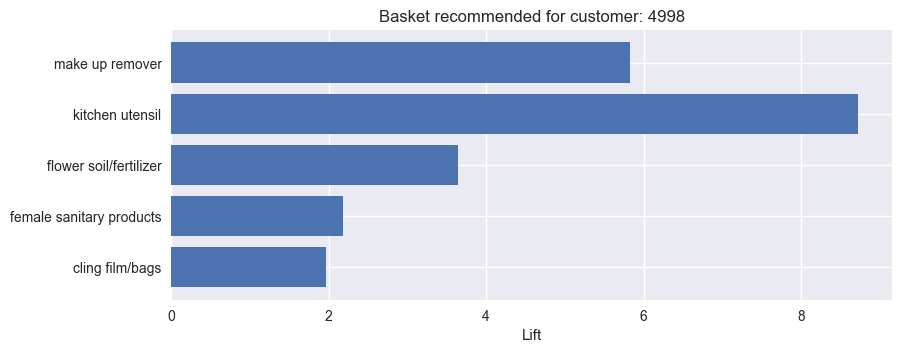

In [618]:
customer_to_plot = 4998

df_plot = customer_basket_analysis.loc[customer_basket_analysis.customer == customer_to_plot]

# More relevant recommendations on top (reason to use [::-1])
plt.barh(y=df_plot.recommended_basket.tolist()[0][::-1], width=df_plot.lift_recommended_basket.tolist()[0][::-1]
)

plt.title(f'Basket recommended for customer: {customer_to_plot}')
plt.xlabel('Lift')

plt.show()